# Face Detector Unit Test

Checks if the face detector is currently working. Note that this does not include face alignment. Currently working:
- [x] S3FD
- [ ] MTCNN

# Setup

First import the required modules, then classes & constants, then functions.

In [1]:
# Import necessary modules
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
from pathlib import Path
import os
from models.detector import face_detector

In [2]:
# Constants
ROOT_DIR = Path.cwd()

# Classes


In [3]:
# Resizes image if it surpasses max_size
def resize_image(im, max_size=768):
    """
    Resizes image if its size surpasses the maximum size limit ('max_size').
    The resizing opertation tries to resize the image as close to the maximum
    limit as possible.

    Inputs:
        1. im - image
        2. max_size - image's maximum size [default=768]

    Output:
        1. res_im - resized or original image

    Example call:
        img = resize_image(original_img, max_size=1000)

    """
    if np.max(im.shape) > max_size:
        ratio = max_size / np.max(im.shape)
        print(f"Resize image to ({str(int(im.shape[1]*ratio))}, \
                                 {str(int(im.shape[0]*ratio))}).")
        return cv2.resize(im, (0,0), fx=ratio, fy=ratio)

    return im

# Load test image
Loads and displays a test image.

Resize image to (768,                                  487).


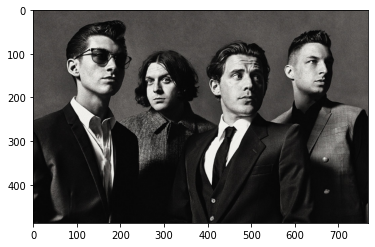

In [4]:
# Test images
TEST_IMG_PTH = "images/test1.jpg"

im = cv2.imread(os.path.join(ROOT_DIR, TEST_IMG_PTH))[..., ::-1]
im = resize_image(im) # Resize image to prevent GPU OOM.
h, w, _ = im.shape;
plt.imshow(im); # supress output

# Testing face detection models
Loads the face alignment detector. Then:
    1. Loads the S3FD detector
    2. Loads the MTCNN detector

Runs both detectors on the test image and shows output.

In [7]:
# S3FD detector
fd_s3fd = face_detector.FaceAlignmentDetector(
    lmd_weights_path="./models/detector/FAN/2DFAN-4_keras.h5"# 2DFAN-4_keras.h5, 2DFAN-1_keras.h5
)

# MTCNN detector NOT WORKING!
#fd_mtcnn = face_detector.FaceAlignmentDetector(fd_type="mtcnn")

In [10]:
bboxes = fd_s3fd.detect_face(im, with_landmarks=False)
assert len(bboxes) > 0, "No face detected."

# Create plot
fig, ax = plt.subplots() # create figure and axes
ax.imshow(im)            # display the image

# Create a Rectangle patch for each region of interest and adds to the axes
for x0, y0, x1, y1, score in bboxes:
    rect = patches.Rectangle((y0, x0), y1 - y0, x1 - x0, linewidth=1, 
                             edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()

Building FAN for landmarks detection...
Instructions for updating:
Colocations handled automatically by placer.
Done.


/home/rpessoa/miniconda3/envs/loki_env/lib/python3.7/site-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


InvalidArgumentError: Default AvgPoolingOp only supports NHWC on device type CPU
	 [[{{node 0.3562700616991372/AvgPool}}]]